# Computing and removing the autocorrelation of a dataset

In [1]:
""" Banana function """
def getLogFuncBanana(point):
    #gets 2d point and return exp
    import numpy as np
    from scipy.stats import multivariate_normal as mvn
    from scipy.special import logsumexp
    
    NPAR = 2                        # sum(Banana,gaussian) normalization factor
    normfac = 0.3                   # sum(Banana,gaussian) normalization factor
    lognormfac = np.log(normfac)    # sum(Banana,gaussian) normalization factor
    a, b = 0.7, 1.5                 # parameters of the Banana function
    MeanB = [ -5.0 , 0. ]           # mean vector of Banana function
    MeanG = [  3.5 , 0. ]           # mean vector of Gaussian function
    CovMatB     = np.reshape([0.25,0.,0.,0.81], newshape = (NPAR,NPAR))    # Covariance matrix of Banana function
    CovMatG     = np.reshape([0.15,0.,0.,0.15], newshape = (NPAR,NPAR))    # Covariance matrix of Gaussian function

    LogProb = np.zeros(2)

    # transformed parameters that transform the Gaussian to the Banana function

    pointSkewed = [ -point[0], +point[1] ]

    # Gaussian function

    LogProb[0] = lognormfac + mvn.logpdf(x = pointSkewed, mean = MeanG, cov = CovMatG) # logProbBanana

    # Do variable transformations for the Skewed-Gaussian (banana) function.

    pointSkewed[1]  = pointSkewed[1] * a
    pointSkewed[0]  = pointSkewed[0] / a - (pointSkewed[1]**2 + a**2) * b

    # Banana function

    LogProb[1] = mvn.logpdf(x = pointSkewed, mean = MeanB, cov = CovMatB) # logProbBanana

    return logsumexp(LogProb)

Generating random sample from the dist function using ParaDRAM MCMC sample:

In [2]:
!pip install --upgrade --user paramonte
import paramonte as pm
sim = pm.paradram()
sim.spec.chainSize = 30000
sim.runSampler( ndim = 2
              , getLogFunc = getLogFuncBanana
              )

/bin/bash: pip: command not found

ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-for

In [18]:
%matplotlib notebook

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
X,Y= np.meshgrid(X,Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z= np.zeros(np.shape(X))
for i in range(len(X[:,0])): #row
    for j in range(len(X[0:,])): #col
        x=X[i,j]
        y =Y[i,j]
        Z[i,j]= np.exp (getLogFuncBanana(point =[x,y]) )
        


# Plot the surface.
surf = ax.plot_surface(X, Y, 
                       Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>

KeyboardInterrupt: 


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readChain()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the chain file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/home/ellabar/DMC2021F/HW4/ParaDRAM_run_20211016_011250_502*_chain.txt"


ParaDRAM - NOTE: processing chain file: /home/ellabar/DMC2021F/HW4/ParaDRAM_run_20211016_011250_502_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 0.345249 seconds.
ParaDRAM - NOTE: ndim = 2, count = 30000
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot

<IPython.core.display.Javascript object>


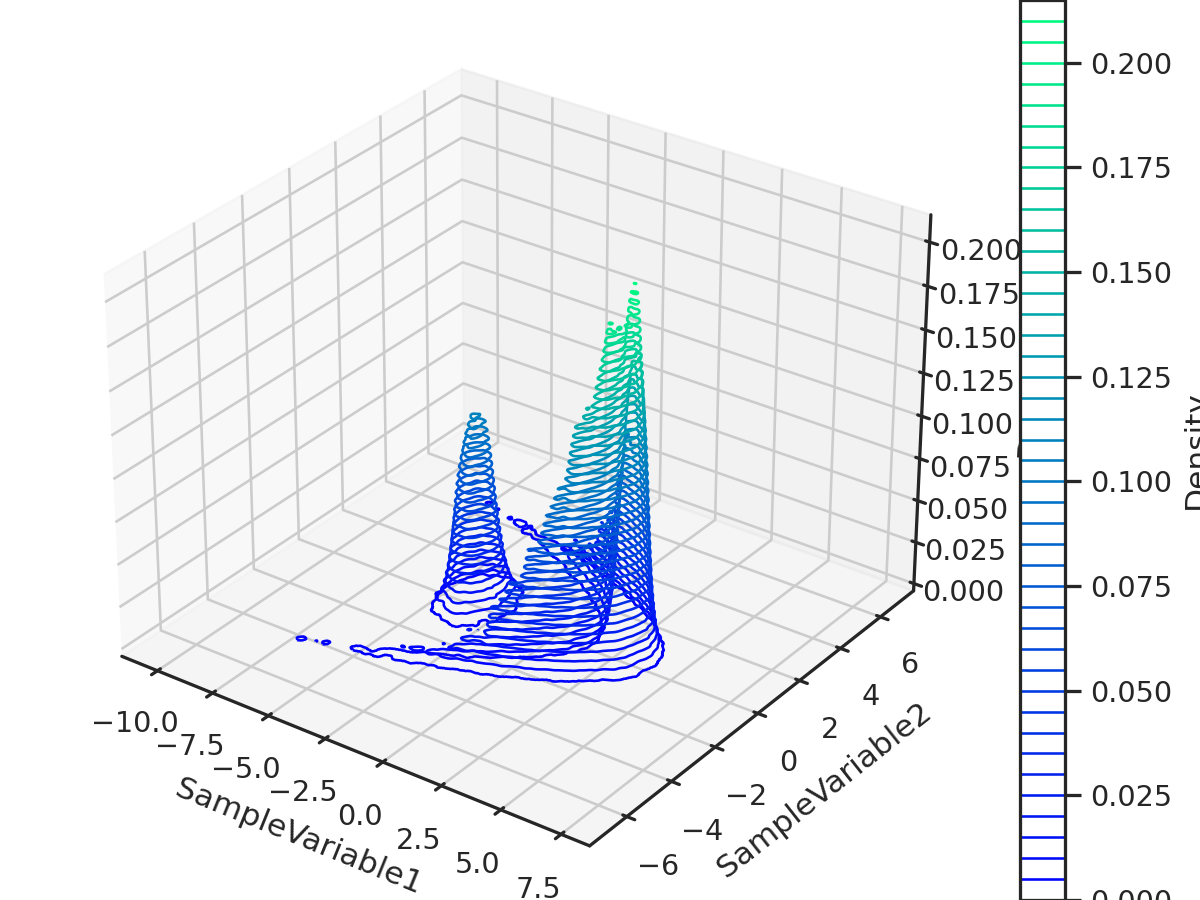

done in 0.788289 seconds.
ParaDRAM - NOTE: saving the plot to file: "bananaFuncContour3.png"
ParaDRAM - NOTE: done in 0.316881 seconds.
ParaDRAM - NOTE: making the scatter3 plot... 

<IPython.core.display.Javascript object>


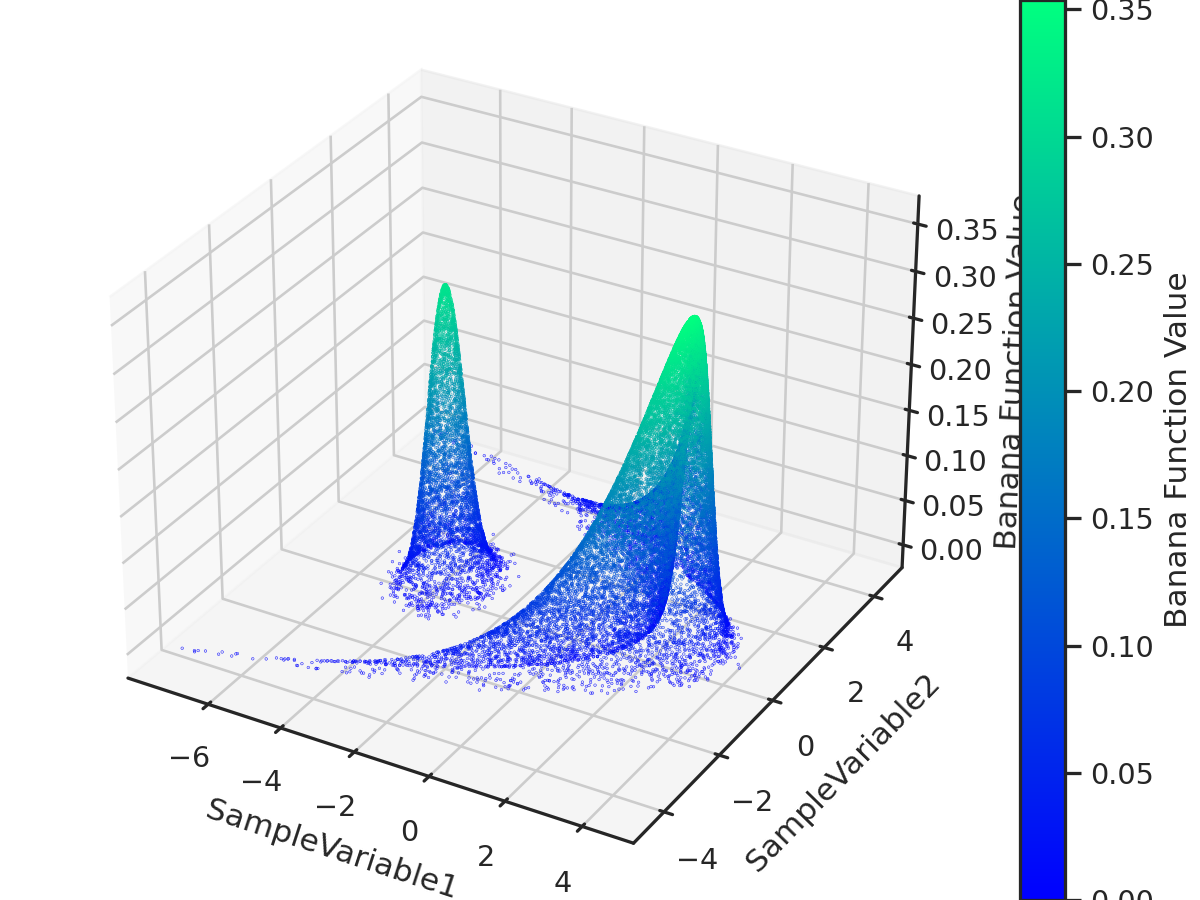

done in 0.198014 seconds.
ParaDRAM - NOTE: saving the plot to file: "bananaFuncScatter3.png"
ParaDRAM - NOTE: done in 0.687473 seconds.


In [3]:
""" Visualizing MCMC chain """

%matplotlib notebook
import numpy as np
chain = sim.readChain(renabled = True)[0]
chain.df["Banana Function Value"] = np.exp(chain.df.SampleLogFunc.values)

chain.plot.contour3()
chain.plot.contour3.savefig(fname = "bananaFuncContour3.png")

chain.plot.scatter3.scatter.kws.s = 0.03
chain.plot.scatter3.scatter.kws.cmap = "winter"
chain.plot.scatter3(zcolumns = "Banana Function Value", ccolumns = "Banana Function Value")
chain.plot.scatter3.savefig(fname = "bananaFuncScatter3.png")

Now, this MCMC chain is a time-series data, meaning that we can compute its autocorrelation (for each data attribute). The ParaMonte library does this for us automatically which we can visualize via:


ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


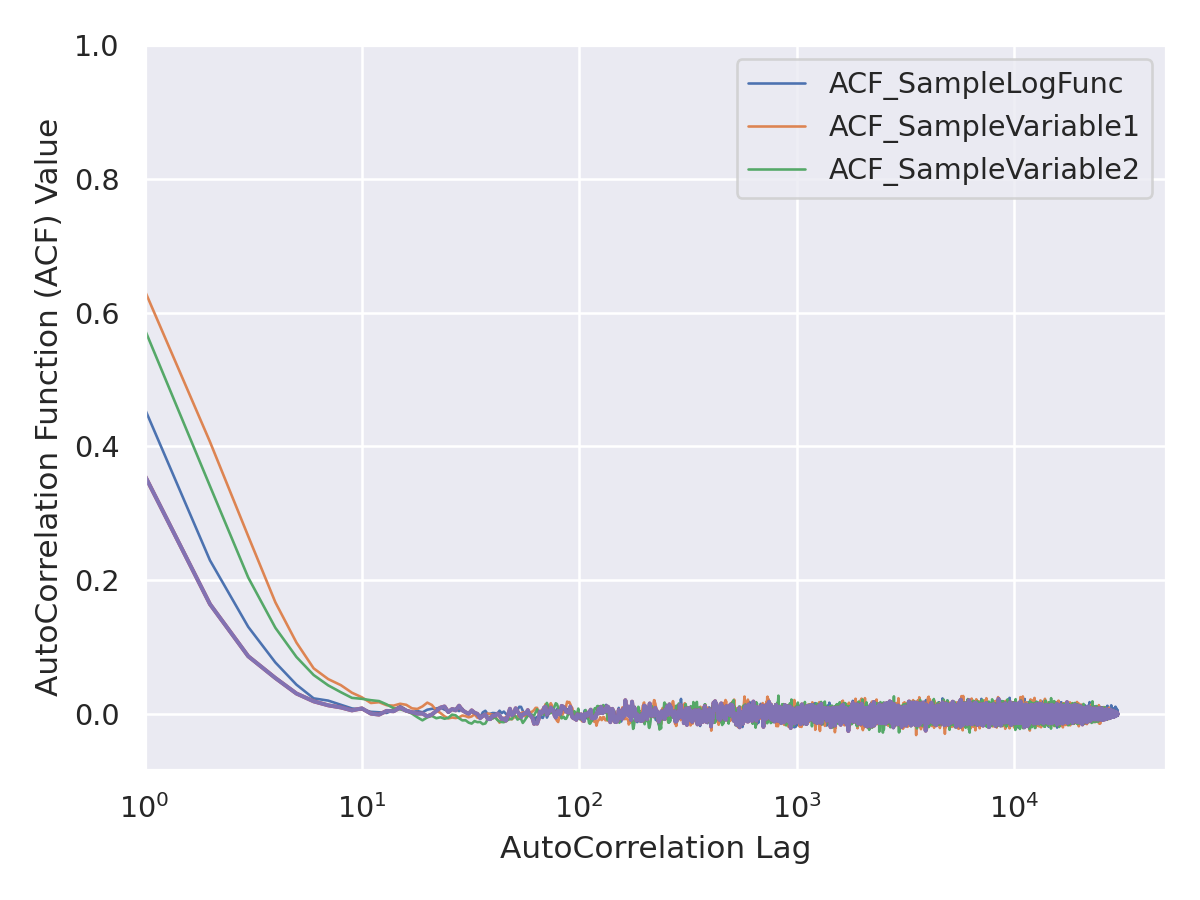

done in 0.61729 seconds.
ParaDRAM - NOTE: saving the plot to file: "bananaCompactChainACF.png"
ParaDRAM - NOTE: done in 0.298366 seconds.


In [4]:
chain.stats.autocorr.plot.line()
chain.stats.autocorr.plot.line.savefig(fname = "bananaCompactChainACF.png")

Choose such an appropriate step size and refine the data in chain.df and then compute the autocorrelation of the refined data via scipy.signal.correlate function. Then, visualize it similar to the above illustration by the ParaMonte library to ensure the refinement process has truly removed the autocorrelation from your data.

In [7]:
chain.df

,ProcessID,DelayedRejectionStage,MeanAcceptanceRate,AdaptationMeasure,BurninLocation,SampleWeight,SampleLogFunc,SampleVariable1,SampleVariable2,Banana Function Value
0,1,0,1.000000,0.000000,1,1,-37.409393,0.000000,0.000000,5.666398e-17
1,1,0,0.666667,0.000000,1,2,-36.621829,-0.597909,3.520352,1.245494e-16
2,1,0,0.376926,0.317912,1,5,-11.368684,-4.101704,1.644731,1.155163e-05
3,1,0,0.365037,0.000000,3,3,-8.530757,-2.697174,1.253506,1.973056e-04
4,1,0,0.373645,0.000000,4,2,-8.961354,-5.031018,-0.031176,1.282725e-04
...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0.106914,0.000000,4,2,-2.411101,1.270242,-1.611614,8.971646e-02
29996,1,0,0.106917,0.000000,4,2,-1.741190,2.842560,-0.952293,1.753116e-01
29997,1,0,0.106918,0.000008,4,2,-2.835609,3.634673,0.157841,5.868278e-02
29998,1,0,0.106918,0.000000,4,1,-4.312346,2.046788,-0.302322,1.340207e-02


In [8]:
attribute=chain.df["Banana Function Value"]

In [11]:
import numpy as np
from scipy.signal import correlate

attribute = attribute - np.mean(attribute)

nlag = len(attribute) - 1
acf = np.zeros(nlag)

acf = correlate ( attribute
                , attribute
                , mode = "full"
                )[nlag:2*nlag]
acf = acf / acf[0]
xacf=[i for i in range(len(acf))]

<IPython.core.display.Javascript object>


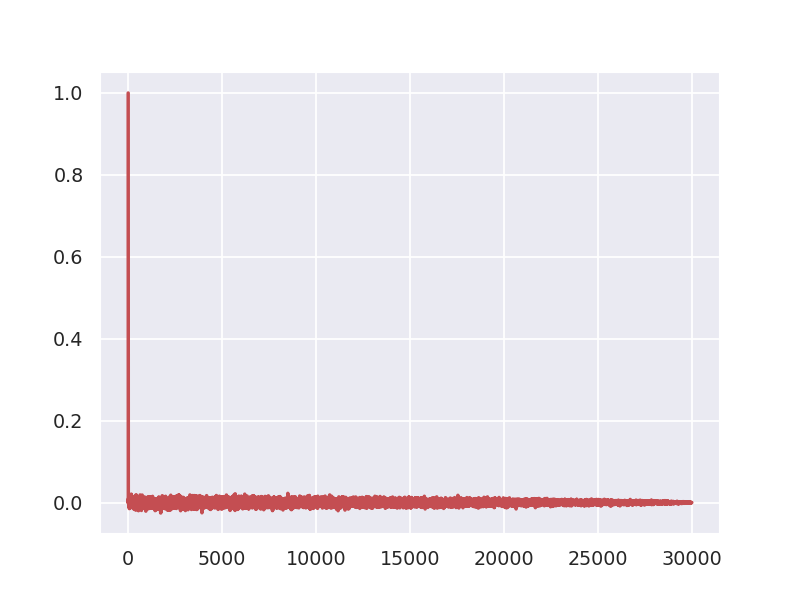

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

fig = plt.figure()
ax = plt.subplot()
ax.plot(xacf,acf, color ="r", linewidth =2 )